In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df_c_w2v = pd.read_excel("./resultados/pipe_completo_tiempos_preproc_Mean_by_N.xlsx")
df_s_w2v = pd.read_excel("./resultados/pipe_completo_tiempos_preproc_sin_w2v_Mean_by_N.xlsx")
df_c_w2v["W2V"] = True
df_s_w2v["W2V"] = False
df = pd.concat([df_c_w2v,df_s_w2v])
df

,N,fit_time,score_time,test_f1,train_f1,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_recall,train_recall,preproc_time_min,W2V
0,100,0.010420,0.005208,0.000000,0.000000,0.680556,0.957071,0.819964,0.819991,0.000000,0.000000,27.507444,True
1,200,0.005208,0.010418,0.078431,0.326295,0.726529,0.953357,0.779964,0.817529,0.044444,0.200000,57.947136,True
2,300,0.020825,0.000000,0.165873,0.377925,0.668019,0.942705,0.773251,0.816614,0.099638,0.242368,93.674761,True
3,400,0.020835,0.011474,0.123221,0.348854,0.711354,0.956956,0.787529,0.826256,0.068199,0.215956,133.408971,True
4,500,0.020834,0.015627,0.243253,0.411793,0.628844,0.947631,0.804018,0.835003,0.145646,0.263606,176.181495,True
0,100,0.010418,0.005208,0.000000,0.000000,0.598949,0.882805,0.819964,0.819991,0.000000,0.000000,1.487117,False
1,200,0.013149,0.001854,0.041667,0.155844,0.702103,0.952024,0.770014,0.795047,0.022222,0.088889,2.911459,False
2,300,0.005207,0.005771,0.233410,0.411419,0.671888,0.945438,0.786552,0.828297,0.141908,0.271508,4.370569,False
3,400,0.010417,0.005210,0.124057,0.337378,0.646957,0.954766,0.792504,0.823745,0.067816,0.204461,5.787067,False
4,500,0.010417,0.010418,0.353617,0.444370,0.690007,0.940316,0.819999,0.838006,0.226727,0.295631,7.274305,False


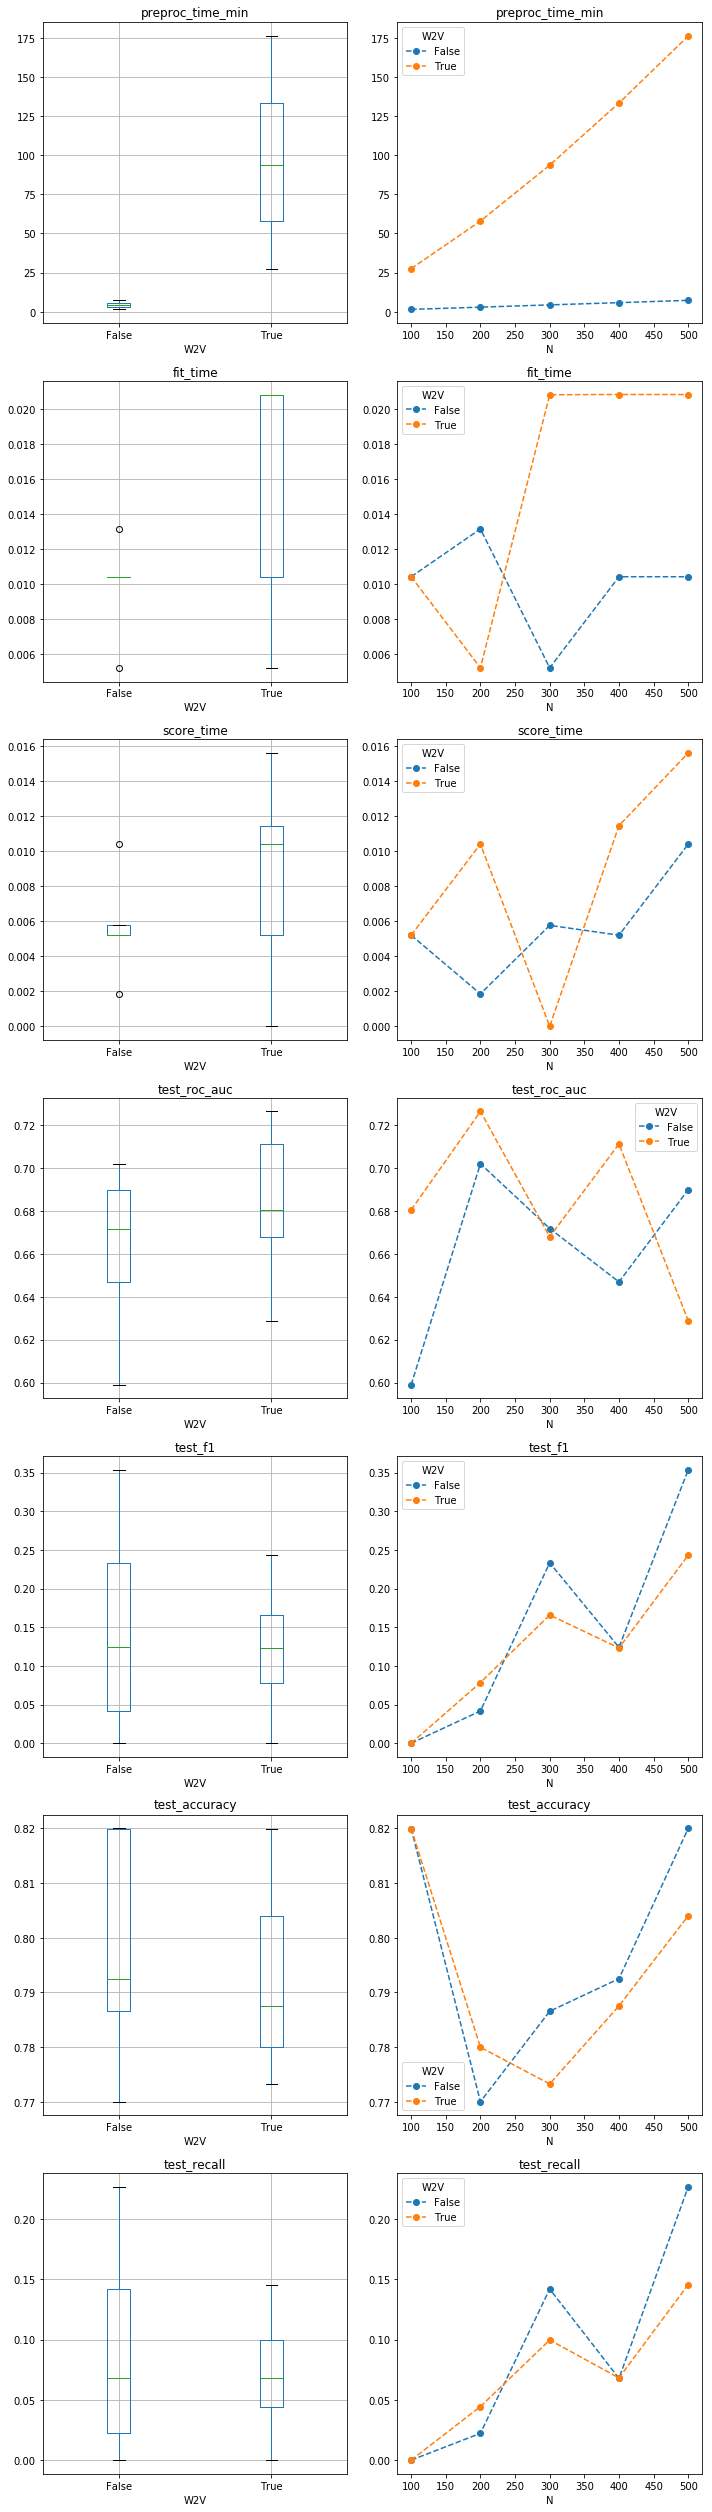

In [58]:
columns = ["preproc_time_min","fit_time","score_time","test_roc_auc","test_f1","test_accuracy","test_recall"]

fig , axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10,5*len(columns)))

SERIES_name = "W2V"
X_name = "N"
IC_flag = False

#loop para plotear
for col_name, ax in list(zip(columns,axes)):
    df.boxplot(column=col_name, by=SERIES_name, ax= ax[0])
    if IC_flag:    
        mean_df = df.groupby([X_name,SERIES_name])[col_name].mean().unstack()
        std_df = df.groupby([X_name,SERIES_name])[col_name].std().unstack()
        for col in mean_df.columns:
            ax[1].fill_between(mean_df.index,mean_df[col]+1.96*std_df[col],mean_df[col]-1.96*std_df[col], alpha=0.2)
            ax[1].plot(mean_df[col], label=col,marker='o', linestyle='dashed')


        ax[1].set_title(col_name)
    else:
        df.groupby([X_name,SERIES_name])[col_name].mean().unstack().plot(ax=ax[1], title=col_name,marker='o', linestyle='dashed')
    
    
    
fig.suptitle("")    
fig.tight_layout()
#para guardar figura
#fig.savefig("./resultados/W2V_comparacion.png",dpi=100)    